In [61]:
import tensorflow as tf
from keras import layers, Sequential
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [28]:
Train = pd.read_csv('Dataset/fashion-mnist_test.csv')
Test = pd.read_csv('Dataset/fashion-mnist_test.csv')

y_train = Train['label'] 
Train.drop('label', axis=1, inplace=True)
X_train = []
for index, row in Train.iterrows():
    X_train.append(row)
X_train = np.array(X_train).reshape(10000, 28, 28, 1)
print(X_train.shape)

y_test = Test['label']
Test.drop('label', axis=1, inplace=True)
X_test = []
for index, row in Test.iterrows():
    X_test.append(row)
X_test = np.array(X_test).reshape(10000, 28, 28, 1)
print(X_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [29]:
shape = X_train.shape[1:]

In [30]:
model = Sequential([
    layers.Input(shape = shape),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu', padding="same"),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = "softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,392 (540.59 KB)

 Trainable params: 138,392 (540.59 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8186 - loss: 0.5054
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8180 - loss: 0.5088
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8217 - loss: 0.5001
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8248 - loss: 0.4846
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8265 - loss: 0.4770
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8271 - loss: 0.4904
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8390 - loss: 0.4487
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8405 - loss: 0.4396
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8425 - loss: 0.4355
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8425 - loss: 0.4640
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8475 - loss: 0.4283
Epoch 12/20
1000/1000 ━━━━━━━━

In [64]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9352 - loss: 0.2066


[0.21108722686767578, 0.9348000288009644]

In [70]:
pred = model.predict(X_test)
model.save("Fashion-MNIST-model.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [68]:
# y_pred = np.argmax(np.array(pred), axis = 1)
# y_pred = np.argmax(pred)
pred = np.array(pred)
y_test = np.array(y_test)
pred = pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(pred.shape)

(10000, 1)


In [67]:
print(classification_report(y_test, pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Text(0.5, 1.0, 'Actual')

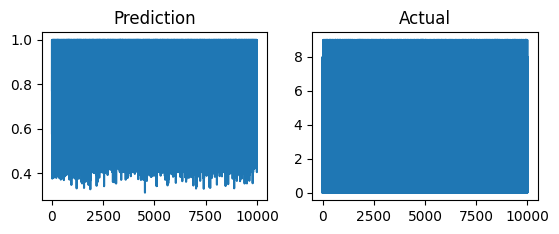

In [62]:
plt.subplot(2, 2, 1)
plt.plot(pred, label = '')
plt.title('Prediction')

plt.subplot(2, 2, 2)
plt.plot(y_test)
plt.title('Actual')